In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import make_classification


In [47]:

import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

# Generate sample data
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Create a DataFrame
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])

# Rescale Feature 1 to the range [1, 10]
df['Feature 1'] = 1 + (df['Feature 1'] - df['Feature 1'].min()) * (10 - 1) / (df['Feature 1'].max() - df['Feature 1'].min())

# Rescale Feature 2 to the range [10, 1000]
df['Feature 2'] = 10 + (df['Feature 2'] - df['Feature 2'].min()) * (1000 - 10) / (df['Feature 2'].max() - df['Feature 2'].min())

# Display the first few rows
print(df.head())


   Feature 1   Feature 2
0   5.184232  711.093967
1   5.395109  278.304405
2   6.209879  314.079532
3   8.590225  503.008205
4   5.391341  591.562240


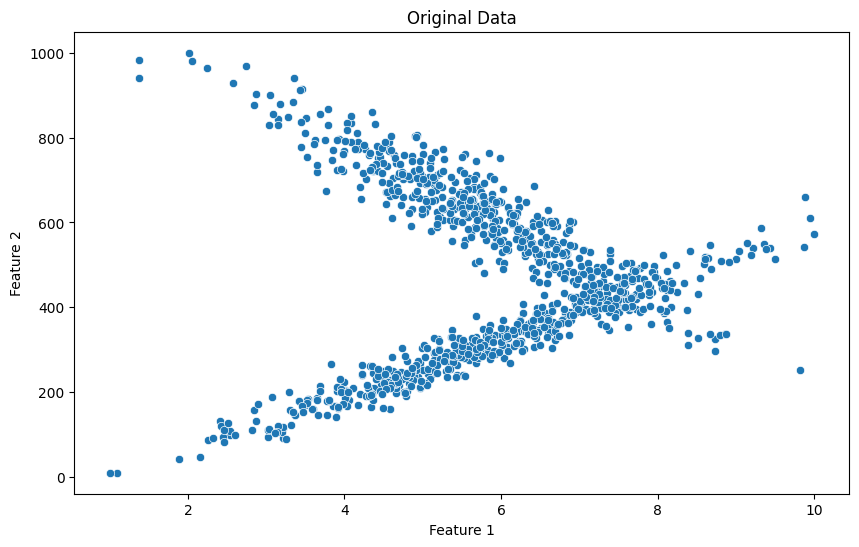

In [48]:
# Function to plot data
def plot_data(data, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Feature 1', y='Feature 2', data=data)
    plt.title(title)
    plt.show()

# Original data
plot_data(df, "Original Data")

In [49]:
print("Original Data Statistics:")
print(df.describe())


Original Data Statistics:
         Feature 1    Feature 2
count  1000.000000  1000.000000
mean      5.762510   463.660023
std       1.458551   195.859927
min       1.000000    10.000000
25%       4.784253   308.366971
50%       5.759665   449.234548
75%       6.713871   621.297490
max      10.000000  1000.000000


# Normalization

**Definition**: Normalization is the process of scaling data into a specific range, typically \([0, 1]\).

**Purpose**: It helps in rescaling features so that they can be compared on the same scale, especially when they have different units or ranges.

**Techniques**:
- **Min-Max Scaling**: Transforms features by scaling them to a range \([0, 1]\).

  $$
  X_{\text{norm}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
  $$

- **MaxAbs Scaling**: Scales each feature by its maximum absolute value, useful for sparse data.

**Applications**: Used when the algorithms do not assume a Gaussian distribution in data (e.g., K-Nearest Neighbors, Neural Networks).

**Pros and Cons**:
- **Pros**: Maintains relationships in data, doesn't affect the distribution shape.
- **Cons**: Sensitive to outliers, as they affect the min and max values significantly.


In [50]:
def normalize_data(df):
  for column in df.columns:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
  return df

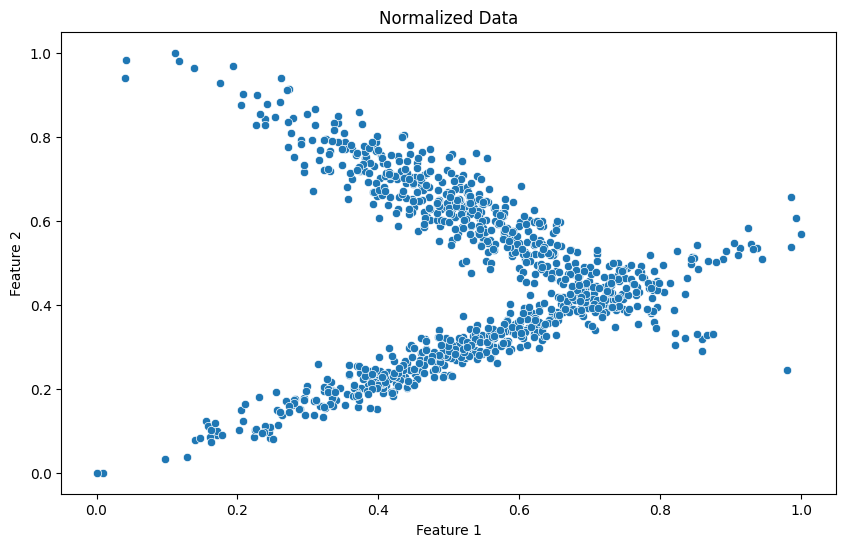

In [51]:
norm_data = normalize_data(df)
plot_data(norm_data, "Normalized Data")

# Standardization

**Definition**: Standardization is the process of transforming data to have a mean of 0 and a standard deviation of 1.

**Purpose**: It helps in adjusting features to be on a common scale, which can be beneficial for many machine learning algorithms that assume a Gaussian distribution of data or require features to be on the same scale.

**Techniques**:
- **Z-score Scaling**: Transforms features using the formula:

  $$
  X_{\text{std}} = \frac{X - \mu}{\sigma}
  $$

  Where \(\mu\) is the mean of the feature and \(\sigma\) is the standard deviation.

**Applications**: Used when algorithms assume a Gaussian distribution in data or require features to be centered and scaled (e.g., Support Vector Machines, Principal Component Analysis).

**Pros and Cons**:
- **Pros**: Reduces bias due to feature scaling differences, less sensitive to outliers compared to normalization.
- **Cons**: Does not bound the values to a specific range, extreme outliers can still have an impact on the mean and standard deviation calculations.


In [52]:
def stand_data(df):
  for column in df.columns:
    df[column] = (df[column] - df[column].mean()) / df[column].std()
  return df

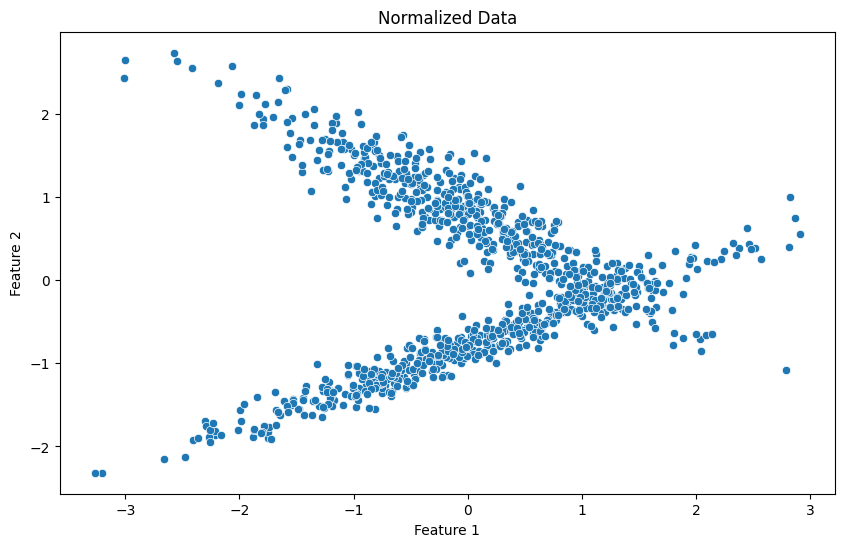

In [53]:
stand_df = stand_data(df)
plot_data(stand_df, "Normalized Data")

#Normalization & Standerdization using SkLearn

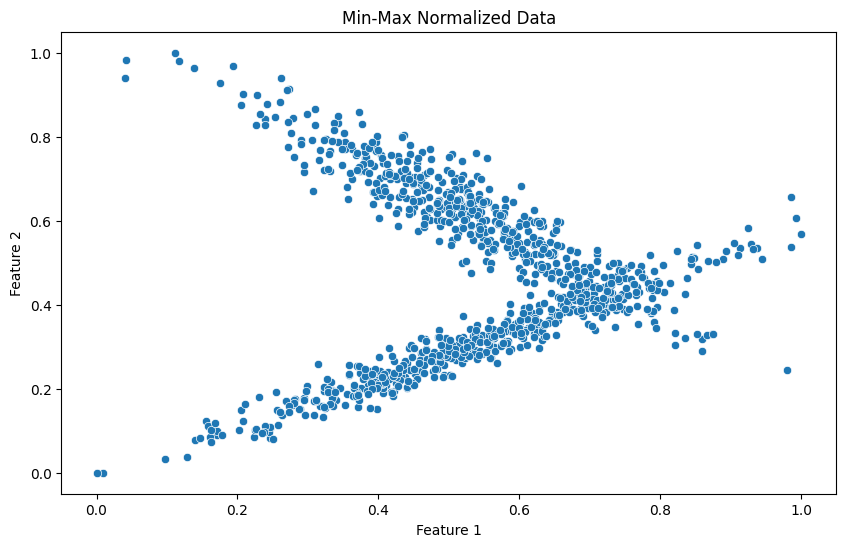

In [54]:

# Min-Max Normalization
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

plot_data(df_normalized, "Min-Max Normalized Data")


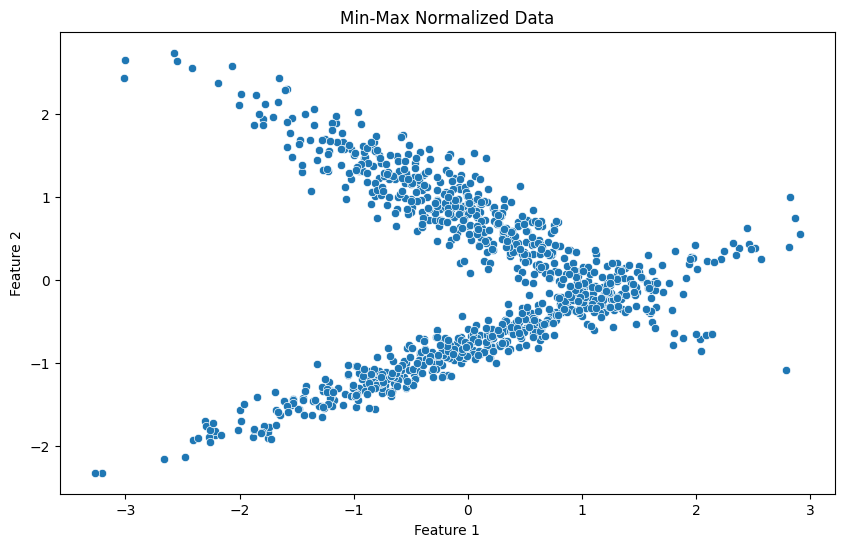

In [55]:

# Min-Max Normalization
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

plot_data(df_standardized, "Min-Max Normalized Data")
